# Continuous Control Project!

Here you can see a basic code to implement ddpg algorithm to an agent learn trajectories.

---

In [1]:
#importing libs

from unityagents import UnityEnvironment
import numpy as np

import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

from ddpg_agent import Agent

In [2]:
# Starting the env.
env = UnityEnvironment(file_name='./Reacher_Linux_NoVis/Reacher.x86') 

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 1
Size of each action: 4
There are 1 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726671e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### Traning the agent

***

In [8]:
# Initialize a agent with 33 state space size and 4 actions
agent = Agent(state_size=33, action_size=4, random_seed=2)

In [9]:
# Main function to train the agent using ddpg algorithm
def ddpg(n_episodes=2000, max_t=1000, print_every=10, learn_every=20, num_learn=10, goal_score=30):
    total_scores_deque = deque(maxlen=100)
    total_scores = []
    
    for i_episode in range(1, n_episodes+1):
        #Reset the env and the agent
        env_info = env.reset(train_mode=True)[brain_name]   # reset the environment 
        states = env_info.vector_observations # get the crrrent states
        scores = np.zeros(num_agents) # initialize the score for each agent
        agent.reset()
        
        
        for t in range(max_t):
            actions = agent.act(states)
            
            env_info = env.step(actions)[brain_name]            # send all actions to the environment
            next_states = env_info.vector_observations          # get next state (for each agent)
            rewards = env_info.rewards                          # get reward (for each agent)
            
            dones = env_info.local_done                         # see if episode finished
            
            for state, action, reward, next_state, done in zip(states, actions, rewards, next_states, dones):
                agent.step(state, action, reward, next_state, done) # send actions to the agent
            
            scores += env_info.rewards                           # update the score (for each agent)
            states = next_states                                # roll over states to next time step
            
            if t%learn_every == 0:         
                for _ in range(num_learn):
                    agent.start_learn()
                    
            if np.any(dones):                                   # exit loop if episode finished
                break
    
        mean_score = np.mean(scores)
        min_score = np.min(scores)
        max_score = np.max(scores)
        total_scores_deque.append(mean_score)
        total_scores.append(mean_score)
        total_average_score = np.mean(total_scores_deque)

        
        print('\rEpisode {}\tTotal Average Score: {:.2f}\tMean: {:.2f}\tMin: {:.2f}\tMax: {:.2f}'
              .format(i_episode, total_average_score, mean_score, min_score, max_score))

        if i_episode % print_every == 0:
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            print('\rEpisode {}\tTotal Average Score: {:.2f}'.format(i_episode, total_average_score))  
            
        if total_average_score >= goal_score and i_episode >= 100:
            print('Problem Solved after {} epsisodes!! Total Average score: {:.2f}'.format(i_episode, total_average_score))
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            break
    
    return total_scores

scores = ddpg() # Train the Agent

/home/leonardo/anaconda3/envs/drlnd/lib/python3.6/site-packages/torch/nn/functional.py:1698: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Episode 1	Total Average Score: 1.00	Mean: 1.00	Min: 1.00	Max: 1.00
Episode 2	Total Average Score: 0.56	Mean: 0.13	Min: 0.13	Max: 0.13
Episode 3	Total Average Score: 0.44	Mean: 0.20	Min: 0.20	Max: 0.20
Episode 4	Total Average Score: 0.33	Mean: 0.00	Min: 0.00	Max: 0.00
Episode 5	Total Average Score: 0.34	Mean: 0.36	Min: 0.36	Max: 0.36
Episode 6	Total Average Score: 0.35	Mean: 0.44	Min: 0.44	Max: 0.44
Episode 7	Total Average Score: 0.45	Mean: 1.05	Min: 1.05	Max: 1.05
Episode 8	Total Average Score: 0.50	Mean: 0.84	Min: 0.84	Max: 0.84
Episode 9	Total Average Score: 0.63	Mean: 1.61	Min: 1.61	Max: 1.61
Episode 10	Total Average Score: 0.67	Mean: 1.07	Min: 1.07	Max: 1.07
Episode 10	Total Average Score: 0.67
Episode 11	Total Average Score: 0.68	Mean: 0.79	Min: 0.79	Max: 0.79
Episode 12	Total Average Score: 0.67	Mean: 0.54	Min: 0.54	Max: 0.54
Episode 13	Total Average Score: 0.83	Mean: 2.82	Min: 2.82	Max: 2.82
Episode 14	Total Average Score: 0.86	Mean: 1.24	Min: 1.24	Max: 1.24
Episode 15	Total Ave

Episode 116	Total Average Score: 3.25	Mean: 6.20	Min: 6.20	Max: 6.20
Episode 117	Total Average Score: 3.32	Mean: 7.22	Min: 7.22	Max: 7.22
Episode 118	Total Average Score: 3.35	Mean: 5.25	Min: 5.25	Max: 5.25
Episode 119	Total Average Score: 3.44	Mean: 8.85	Min: 8.85	Max: 8.85
Episode 120	Total Average Score: 3.52	Mean: 8.72	Min: 8.72	Max: 8.72
Episode 120	Total Average Score: 3.52
Episode 121	Total Average Score: 3.59	Mean: 8.69	Min: 8.69	Max: 8.69
Episode 122	Total Average Score: 3.68	Mean: 11.18	Min: 11.18	Max: 11.18
Episode 123	Total Average Score: 3.72	Mean: 4.07	Min: 4.07	Max: 4.07
Episode 124	Total Average Score: 3.80	Mean: 8.43	Min: 8.43	Max: 8.43
Episode 125	Total Average Score: 3.86	Mean: 7.85	Min: 7.85	Max: 7.85
Episode 126	Total Average Score: 3.92	Mean: 7.46	Min: 7.46	Max: 7.46
Episode 127	Total Average Score: 4.01	Mean: 9.72	Min: 9.72	Max: 9.72
Episode 128	Total Average Score: 4.16	Mean: 17.52	Min: 17.52	Max: 17.52
Episode 129	Total Average Score: 4.27	Mean: 11.32	Min: 11.3

Episode 224	Total Average Score: 22.56	Mean: 34.86	Min: 34.86	Max: 34.86
Episode 225	Total Average Score: 22.86	Mean: 37.39	Min: 37.39	Max: 37.39
Episode 226	Total Average Score: 23.14	Mean: 35.13	Min: 35.13	Max: 35.13
Episode 227	Total Average Score: 23.34	Mean: 30.21	Min: 30.21	Max: 30.21
Episode 228	Total Average Score: 23.36	Mean: 19.13	Min: 19.13	Max: 19.13
Episode 229	Total Average Score: 23.63	Mean: 38.86	Min: 38.86	Max: 38.86
Episode 230	Total Average Score: 23.82	Mean: 26.93	Min: 26.93	Max: 26.93
Episode 230	Total Average Score: 23.82
Episode 231	Total Average Score: 24.05	Mean: 33.52	Min: 33.52	Max: 33.52
Episode 232	Total Average Score: 24.31	Mean: 34.35	Min: 34.35	Max: 34.35
Episode 233	Total Average Score: 24.55	Mean: 38.15	Min: 38.15	Max: 38.15
Episode 234	Total Average Score: 24.82	Mean: 38.70	Min: 38.70	Max: 38.70
Episode 235	Total Average Score: 25.03	Mean: 36.34	Min: 36.34	Max: 36.34
Episode 236	Total Average Score: 25.28	Mean: 38.29	Min: 38.29	Max: 38.29
Episode 237	

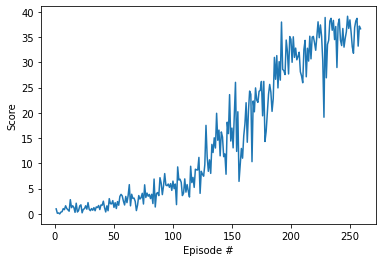

In [11]:
# Plotting the results ...
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.savefig('results.png')
plt.show()

In [ ]:
# env.close()